In [1]:
%matplotlib notebook
from IPython.display import display, HTML
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.notebook_repr_html', True)
plt.style.use('ggplot')

%run simplex_utils.py

# Linear Programming and the Simplex Method
Su Hang
<br>November 25, 2015

Junior in Columbia College<br>
Studying Applied Math and Computer Science

# The (College Student) Diet Problem

Objective Function
$$
\text{minimise} \quad 5r + 7s
$$

Constraints
\begin{align}
\text{Fibre}\quad&2r +  s \geq 4 \\
\text{Protein}\quad&3r + 3s \geq 3 \\
\text{Carbohydrates}\quad&3r + 4s \geq 6
\end{align}

## Visualising the Problem

<IPython.core.display.Javascript object>


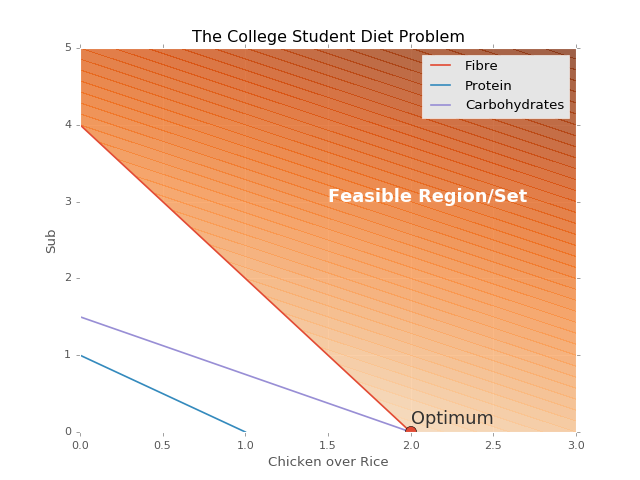

/Users/suhang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
constraints_csd = numpy.array([[-2.0,-1.0,-4.0],
                               [-3.0,-3.0,-3.0],
                               [-3.0,-4.0,-6.0]])
axes = plot_it(x_1_bounds=[0.0,3.0], x_2_bounds=[0.0,5.0], constraints=constraints_csd,
               constraint_labels=['Fibre', 'Protein', 'Carbohydrates'] , objective=[5,7],
               auc=False, title='The College Student Diet Problem',
               xlabel='Chicken over Rice', ylabel='Sub', legend_loc=1)
r_cut = numpy.linspace(0.0, 2.0, 100)
axes.fill_between(r_cut, (constraints_csd[0,2] - constraints_csd[0,0] * r_cut) / constraints_csd[0,1], color='w')
axes.plot(2.0, 0.0, 'o', markersize=10)
axes.text(1.5, 3.0, 'Feasible Region/Set', fontsize=16, weight='bold', color='w')
axes.text(2.0, 0.1, 'Optimum', fontsize=16, color='#303030')
plt.show()

### Rules

* Fulfil daily servings requirements
* Can't buy negative amounts of food

satisfied by the **Feasible Region/Set**

**Optimum** spend as little money on food as possible, within the feasible region

# Linear Programming

### Optimising a linear objective function subject to linear constraints

Used in the diet problem, the transportation problem, scheduling, optimising product mixes, operations research, finance, etc. etc.

# Standard Form and Duality

<IPython.core.display.Javascript object>


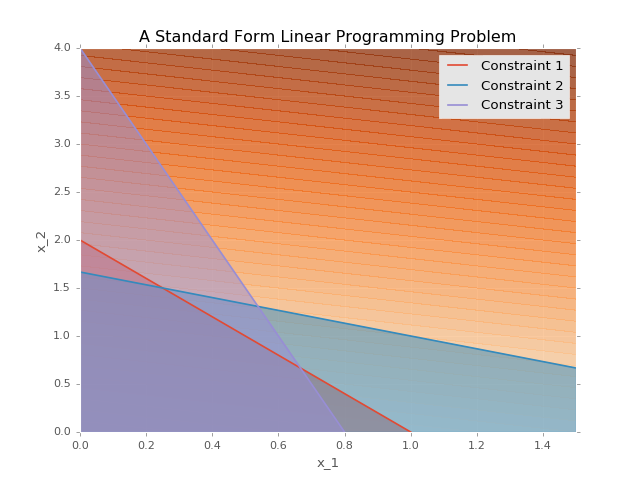

In [3]:
constraints_ex = numpy.array([[2.0,1.0,2.0],
                              [2.0,3.0,5.0],
                              [5.0,1.0,4.0]])
axes = plot_it(x_1_bounds=[0.0,1.5], x_2_bounds=[0.0,4.0], constraints=constraints_ex, objective=[5,13],
              title='A Standard Form Linear Programming Problem', legend_loc=1)

plt.show()

## Dual Form

\begin{align}
\text{maximise}   \quad & b_1 x_1 + b_2 x_2 + \ldots + b_m x_m \\
\text{subject to} \quad & a_{11} x_{1} + a_{21} x_{2} + \ldots + a_{m1} x_{m} \leq c_1 \\
                        & a_{12} x_{1} + a_{22} x_{2} + \ldots + a_{m2} x_{m} \leq c_2 \\
                        & \vdots \\
                        & a_{1n} x_{1} + a_{2n} x_{2} + \ldots + a_{mn} x_{m} \leq c_n 
\end{align}

in less symbols, this is

\begin{align}
\text{maximise}    \quad & b^T x     \\
\text{subject to}  \quad & Ax \leq c
\end{align}

## Primal Form

\begin{align}
\text{minimise}   \quad & c_1 y_1 + c_2 y_2 + \ldots + c_m y_ n\\
\text{subject to} \quad & a_{11} y_{1} + a_{12} y_{2} + \ldots + a_{1n} y_{n} = b_1 \\
                        & a_{21} y_{1} + a_{22} y_{2} + \ldots + a_{m2} y_{n} = b_2 \\
                        & \vdots \\
                        & a_{m1} y_{1} + a_{m2} y_{2} + \ldots + a_{nm} y_{n} = b_m \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^m
\end{align}

in less symbols, this is
\begin{align}
\text{minimise}    \quad & c^T y     \\
\text{subject to}  \quad & A^T y = b \\
\text{and}         \quad & y \geq 0
\end{align}

**The optimal value for both the primal and the dual form are exactly the same!**

aka the **Duality gap**. In general, this may not be zero for other sorts of optimisation problems.

## Duality: A History

![](https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif)
#### <center>John von Neumann</center>

Duality as a two player zero sum game

# The Simplex Method

![](http://i.kinja-img.com/gawker-media/image/upload/s--Nsf4eKIB--/17p1ricsvp65wjpg.jpg)
#### <center>George Dantzig</center>

Came up with the Simplex Method while with the US Air Force during WWII

Was classified information for a while!

This was around the time when computers were just starting to become a thing.

Really shines when solving large systems

> ### "I owe a great debt to Jerzy Neyman, the leading mathematical statistician of his day, who guided my graduate work at Berkeley. My thesis was on two famous unsolved problems in mathematical statistics that I _mistakenly thought were a homework assignment and solved._ ... Luckily, the particular geometry used in my thesis was the one associated with the columns of the matrix instead of its rows. This column geometry gave me the insight that led me to believe that the Simplex Method would be a very efficient solution technique."
— George B. Dantzig, in the Foreword to _Linear Programming I: Introduction_

## The Intuition

<IPython.core.display.Javascript object>


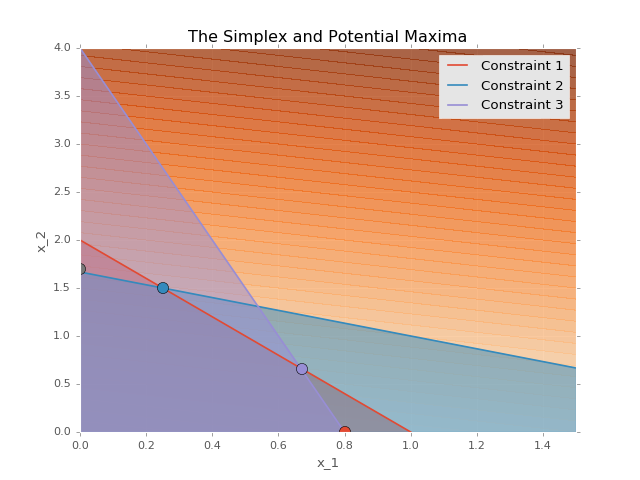

In [4]:
constraints_ex = numpy.array([[2.0,1.0,2.0],
                              [2.0,3.0,5.0],
                              [5.0,1.0,4.0]])
axes = plot_it(x_1_bounds=[0.0,1.5], x_2_bounds=[0.0,4.0], constraints=constraints_ex, objective=[5,13],
              title='The Simplex and Potential Maxima', legend_loc=1)
# very rough positions of optima
axes.plot( 0.8,   0, 'o', markersize=10)
axes.plot(0.25, 1.5, 'o', markersize=10)
axes.plot(0.67,0.66, 'o', markersize=10)
axes.plot( 0.0, 1.7, 'o', markersize=10)

plt.show()

## The Algorithm

> ### Determine your objective and your constraints, and put your system of constraint equations in a tableau.
>
> ### While the last row of your tableau still has negative values,
>
>> ### Choose the entering variable to be the non-basic variable with the most negative coefficient
>>
>> ### Choose the departing variable from the list of basic variables using the minimum ratio test
>>
>> ### Normalise the pivot row (row containing departing variable) and perform Gaussian Elimination in the pivot column (column containing entering variable)
>
> ### ???
>
> ### Profit

## The Code

In [5]:
def pivot(departing, entering, tab):
    dpi = tab[tab['basic_variable']==departing].index[0] # index of the departing row
    
    # update basic variable
    tab['basic_variable'][dpi] = entering

    # normalise departing_row
    tab.ix[dpi,0:-1] = tab.ix[dpi,0:-1] / tab[entering][dpi]

    departing_row = tab.ix[dpi,0:-1]

    # do gauss-jordan on entering variable column
    for row in tab.index[tab.index!=dpi]:
        tab.ix[row, 0:-1] = tab.ix[row, 0:-1] - tab[entering][row] * departing_row

In [6]:
# Bland's rule
def calculate_ratio(entering, tab):
    # allocate space
    ratios = tab.ix[0:-1, 'value'] * 0.0 - 1.0
    
    # if the pivot value is >0, return the ratio, else return -1 for invalid ratio
    for index, is_valid in enumerate(tab.ix[0:-1, entering] > 0):
        if is_valid==True:
            ratios[index] = tab.ix[index, 'value']/tab.ix[index, entering]
    return ratios

In [7]:
# the entering variable is the variable with
# the most negative coefficient in the last
# row of the tableau
def find_entering(tab):
    return tab.ix['z',0:-2].idxmin()

In [8]:
# the departing variable is the variable with
# the smallest non-negative ratio between its
# value and its pivot-column coefficient
def find_departing(ratios, tab):
    return tab.ix[ratios[ratios>=0].idxmin(),'basic_variable']

In [9]:
def update_stats(tab):
        
    print "Basic variables: "
    basic_variables = tab.ix[0:-1, 'basic_variable'].values
    print basic_variables
    
    print "Non-basic variables: "
    non_basic_variables = numpy.setdiff1d(tab.columns[0:-2], basic_variables)
    print non_basic_variables
    
    print "Entering variable: "
    entering_variable = find_entering(tab)
    print entering_variable
    
    print "Ratios: "
    ratios = calculate_ratio(entering_variable, tab)
    print ratios
    
    print "Departing variable: "
    departing_variable = find_departing(ratios, tab)
    print departing_variable
    
    return departing_variable, entering_variable

In [10]:
# the optimal solution has been found when all the coefficients in the last row are positive
def is_optimum(tab):
    return (tab.ix['z',0:-2] >= 0).all()

In [11]:
def run_simplex(tableau_dict, tableau_orig, max_iterations=10, force_iterations=0):
    if force_iterations == 0:
        for i in xrange(max_iterations):
            tableau_dict[i] = tableau_orig.copy()
            display(tableau_orig)
            if is_optimum(tableau_orig):
                break
            departing_variable, entering_variable = update_stats(tableau_orig)
            pivot(departing_variable, entering_variable, tableau_orig)
    else:
        for i in xrange(force_iterations):
            tableau_dict[i] = tableau_orig.copy()
            display(tableau_orig)
            departing_variable, entering_variable = update_stats(tableau_orig)
            pivot(departing_variable, entering_variable, tableau_orig)

## Step 0: System of Constraint Equations

Once we have our problem in standard form, we have to put it in a system of constraint equations in order to feed it to the simplex method

\begin{align}
\text{maximise}   \quad & c_1 x_1 + c_2 x_2 + \ldots + c_m x_m = z \\
\text{subject to} \quad & a_11 x_1 + a_12 x_2 + \ldots + a_1m x_m + s_1 = b_1 \\
                        & a_21 x_2 + a_22 x_2 + \ldots + a_2m x_m + s_2 =  b_2 \\
                        & \vdots \\
                        & a_n1 x_n + a_n2 x_n + \ldots + a_nm x_m + s_n =  b_n \\
\text{and}        \quad & \{ x_i \geq 0 \}_{i=1}^{m}, ~ \{ s_i \geq 0 \}_{j=1}^{n}, ~ \text{ and } \{ b_j \geq 0 \}_{j=1}^n
\end{align}

### Tricks:
Trying to minimise the objective function?
$\implies$ Maxmise its negative!

Have inequality constraints?
$\implies$ Turn them into equality constraints by adding **slack variables**

Equations still don't fit the standard form?
$\implies$ Solve the **dual form** of the problem!

## Back to the College Student Diet

Taking another look at our diet problem,

\begin{align}
\text{maximise}   \quad & - 5r - 7s          \\
\text{subject to} \quad & - 2r -  s \leq - 4 \\
                        & - 3r - 3s \leq - 3 \\
                        & - 3r - 4s \leq - 6 \\
\text{and}        \quad & r, s \geq 0
\end{align}

we see that we can't really put it into standard form because our constraints have negative constants.

One way we can resolve this is with duality

\begin{align}
\text{maximise}   \quad &   6y_1 + 3y_2 + 4y_3       \\
\text{subject to} \quad &   3y_1 + 3y_2 + 2y_3 \leq 5 \\
                        &   4y_1 + 3y_2 +  y_3 \leq 7 \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^3 \\
\end{align}

can think of this as trying to maximise nutritional value.

We then add slack variables to turn our inequalities into equalities.

Hence, the constraint equations are

\begin{align}
\text{maximise}   \quad &   6y_1 + 3y_2 + 4y_3 = z      \\
\text{subject to} \quad &   3y_1 + 3y_2 + 2y_3 + s_1 = 5 \\
                        &   4y_1 + 3y_2 +  y_3 + s_2 = 7 \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^3 \text{ and } \{ s_i \geq 0 \}_{i=1}^2 \\
\end{align}

In [12]:
tableau = make_tableau(constraints=np.array([[ 3,  3,  2, 1, 0, 5, 's_1'],
                                             [ 4,  3,  1, 0, 1, 7, 's_2']]),
             objective=np.array([[-6, -3, -4, 0, 0, 0,    '']]),
             variables=['y_1','y_2','y_3','s_1','s_2'])
tableaux = dict()
run_simplex(tableaux, tableau)

,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,3,3,2,1,0,5,s_1
c_2,4,3,1,0,1,7,s_2
z,-6,-3,-4,0,0,0,


Basic variables: 
['s_1' 's_2']
Non-basic variables: 
['y_1' 'y_2' 'y_3']
Entering variable: 
y_1
Ratios: 
c_1    1.66667
c_2       1.75
Name: value, dtype: object
Departing variable: 
s_1


,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,1,1,0.666667,0.333333,0,1.66667,y_1
c_2,0,-1,-1.66667,-1.33333,1,0.333333,s_2
z,0,3,0,2,0,10,


What are basic variables?

What are non-basic variables?

What is an entering variable?

What is a departing variable?

How do we choose entering and departing variables?

What does this all mean?

How do I read a tableau to find out the maximal value? The values of the "proper" variables?

### Bland's Rule

> #### Choose the entering variable to be the non-basic variable with the most negative coefficient
>
> #### Choose the departing variable from the list of basic variables using the minimum ratio test

Why does Bland's rule work?

In [13]:
tableaux[0]

,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,3,3,2,1,0,5,s_1
c_2,4,3,1,0,1,7,s_2
z,-6,-3,-4,0,0,0,


$$
z = 0 = 6 y_1 + 3 y_2 + 4 y_3
$$

$y_1$, $y_2$, and $y_3$ are currently 0, since they are non-basic variables.

In [14]:
step_coords = numpy.array([[0.0, 0.0], [2.0, 0.0]])

def diet_problem(step): 
    axes = plot_it(x_1_bounds=[0.0,3.0], x_2_bounds=[0.0,5.0], constraints=constraints_csd,
                   constraint_labels=['Fibre', 'Protein', 'Carbohydrates'] , objective=[5,7], auc=False,
                   title='The College Student Diet Problem (Dual Form)', xlabel='Chicken over Rice', ylabel='Sub', legend_loc=1)
    axes.plot(step_coords[step][0], step_coords[step][1], 'ro', markersize=20)
    axes.fill_between(r_cut, (constraints_csd[0,2] - constraints_csd[0,0] * r_cut) / constraints_csd[0,1], color='w')
    display(tableaux[step])
    plt.show()

<IPython.core.display.Javascript object>


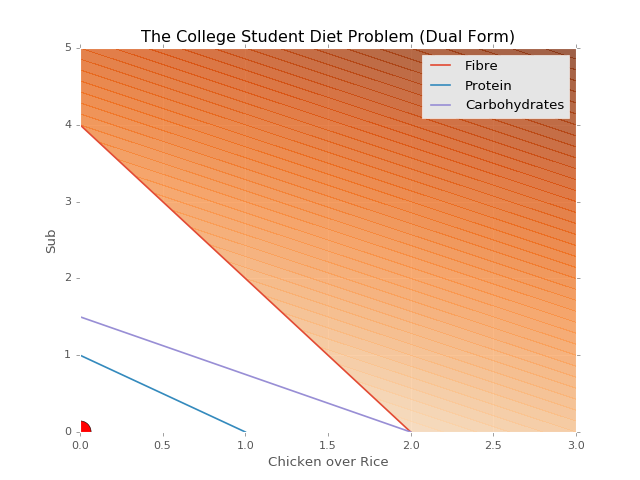

,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,3,3,2,1,0,5,s_1
c_2,4,3,1,0,1,7,s_2
z,-6,-3,-4,0,0,0,


In [15]:
interact(diet_problem, step=(0,1));

## Multiple Optimal Solutions

<IPython.core.display.Javascript object>


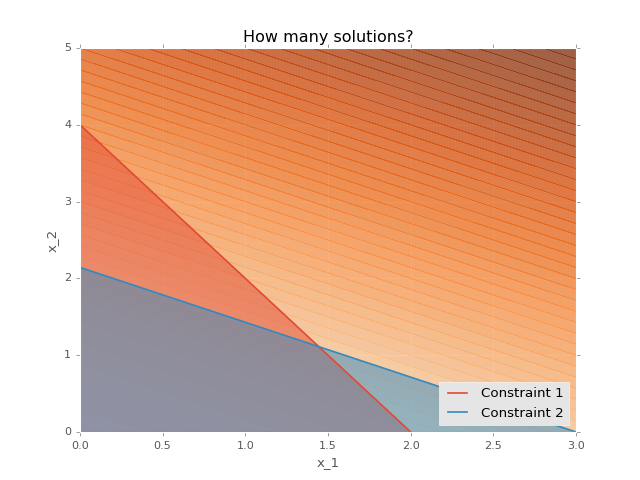

In [17]:
constraints_mos = numpy.array([[ 2, 1, 4],
                           [10,14,30]])
axes = plot_it(x_1_bounds=[0.0,3.0], x_2_bounds=[0.0,5.0], constraints=constraints_mos, objective=[5,7], 
               title='How many solutions?')
plt.show()

\begin{align}
\text{maximise}   \quad &  5x_1 +  7x_2          \\
\text{subject to} \quad &  2x_1 +   x_2 \leq 4 \\
                        & 10x_1 + 14x_2 \leq 30 \\
\text{and}        \quad & x_1, x_2 \geq 0
\end{align}

In [22]:
tableau_multiple = make_tableau(constraints=np.array([[ 2,  1,  1, 0,  4, 's_1'],
                                                      [10, 14,  0, 1, 30, 's_2']]),
                   objective=np.array([[-5, -7, 0, 0, 0,    '']]),
                   variables=['x_1','x_2','s_1','s_2'])
tableaux_multiple = dict()
run_simplex(tableaux_multiple, tableau_multiple, force_iterations=3)

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,2,1,1,0,4,s_1
c_2,10,14,0,1,30,s_2
z,-5,-7,0,0,0,


Basic variables: 
['s_1' 's_2']
Non-basic variables: 
['x_1' 'x_2']
Entering variable: 
x_2
Ratios: 
c_1          4
c_2    2.14286
Name: value, dtype: object
Departing variable: 
s_2


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,1.28571,0,1,-0.0714286,1.85714,s_1
c_2,0.714286,1,0,0.0714286,2.14286,x_2
z,0,0,0,0.5,15,


Basic variables: 
['s_1' 'x_2']
Non-basic variables: 
['s_2' 'x_1']
Entering variable: 
x_1
Ratios: 
c_1    1.44444
c_2          3
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,1,0,0.777778,-0.0555556,1.44444,x_1
c_2,0,1,-0.555556,0.111111,1.11111,x_2
z,0,0,0,0.5,15,


Basic variables: 
['x_1' 'x_2']
Non-basic variables: 
['s_1' 's_2']
Entering variable: 
x_1
Ratios: 
c_1    1.44444
c_2         -1
Name: value, dtype: object
Departing variable: 
x_1


In [23]:
# constraints = numpy.array([[ 2.0, 1.0, 4.0],
#                            [10.0,14.0,30.0]])
step_coords, step_value = calculate_steps(tableaux_multiple)

def multiple_optima(step): 
    axes = plot_it(x_1_bounds=[0.0,3.0], x_2_bounds=[0.0,5.0], constraints
                   =constraints_mos, objective=[5,7], 
               title='How many solutions?')
    axes.plot(step_coords[step,0], step_coords[step,1], 'ro', markersize=20)
    axes.text(step_coords[step][0]+0.1, step_coords[step][1], step_value[step], fontsize=16)
    display(tableaux_multiple[step])
    plt.show()

In [24]:
interact(multiple_optima, step=(0,2))

<IPython.core.display.Javascript object>

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,1.28571,0,1,-0.0714286,1.85714,s_1
c_2,0.714286,1,0,0.0714286,2.14286,x_2
z,0,0,0,0.5,15,


<function __main__.multiple_optima>

## Unbounded Optima

In [25]:
constraints_uo = numpy.array([[  -1, 1, 5],
                           [-0.5, 1, 7]])
axes = plot_it(x_1_bounds=[0.0,20.0], x_2_bounds=[0.0,25.0], constraints=constraints_uo, objective=[5,7], 
               title='How many solutions?')
plt.show()

<IPython.core.display.Javascript object>

\begin{align}
\text{maximise}   \quad &  5x_1 +  7x_2          \\
\text{subject to} \quad &  -x_1 +   x_2 \leq 5 \\
                        & -\frac{1}{2}x_1 + x_2 \leq 7 \\
\text{and}        \quad & x_1, x_2 \geq 0
\end{align}

In [27]:
tableau_unbounded = make_tableau(constraints=np.array([[-1.0,  1.0,  1.0, 0.0,  5.0, 's_1'],
                                                       [-0.5,  1.0,  0.0, 1.0,  7.0, 's_2']]),
                                 objective=np.array([[-5.0, -7.0, 0.0, 0.0, 0.0,    '']]),
                                 variables=['x_1','x_2','s_1','s_2'])
tableaux_unbounded = dict()
run_simplex(tableaux_unbounded, tableau_unbounded)

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,-1,1,1,0,5,s_1
c_2,-0.5,1,0,1,7,s_2
z,-5,-7,0,0,0,


Basic variables: 
['s_1' 's_2']
Non-basic variables: 
['x_1' 'x_2']
Entering variable: 
x_2
Ratios: 
c_1    5
c_2    7
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,-1,1,1,0,5,x_2
c_2,0.5,0,-1,1,2,s_2
z,-12,0,7,0,35,


Basic variables: 
['x_2' 's_2']
Non-basic variables: 
['s_1' 'x_1']
Entering variable: 
x_1
Ratios: 
c_1   -1
c_2    4
Name: value, dtype: object
Departing variable: 
s_2


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,0,1,-1,2,9,x_2
c_2,1,0,-2,2,4,x_1
z,0,0,-17,24,83,


Basic variables: 
['x_2' 'x_1']
Non-basic variables: 
['s_1' 's_2']
Entering variable: 
s_1
Ratios: 
c_1   -1
c_2   -1
Name: value, dtype: object
Departing variable: 


ValueError: attempt to get argmin of an empty sequence

We got an error!

    ValueError: attempt to get argmin of an empty sequence

Usually, errors are bad things, but in this case, the error is trying to tell us something

In the code:
    
    return tab.ix[ratios[ratios>=0].idxmin(),'basic_variable']

Which is telling us that no non-negative ratio was found!

In [28]:
display(tableau_unbounded)

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,0,1,-1,2,9,x_2
c_2,1,0,-2,2,4,x_1
z,0,0,-17,24,83,


\begin{gather}
  z = 83 + 17 s_1 - 24 s_2 \\
x_1 = 4 + 2 s_1 - 2 s_2 \\
x_2 = 9 + s_1 - 2 s_2
\end{gather}

Increasing the value of $s_1$ would also increase the value of both our basic variables!

In [29]:
constraints_uo = numpy.array([[  -1.0, 1.0, 5.0],
                           [-0.5, 1.0, 7.0]])
step_coords, step_value = calculate_steps(tableaux_unbounded)

def unbounded_optima(step): 
    axes = plot_it(x_1_bounds=[0.0,20.0], x_2_bounds=[0.0,25.0], constraints=constraints_uo, objective=[5.0,7.0], 
               title='How many solutions?')
    axes.plot(step_coords[step,0], step_coords[step,1], 'ro', markersize=20)
    axes.text(step_coords[step][0]+0.5, step_coords[step][1], step_value[step], fontsize=16)
    display(tableaux_unbounded[step])
    plt.show()

<IPython.core.display.Javascript object>


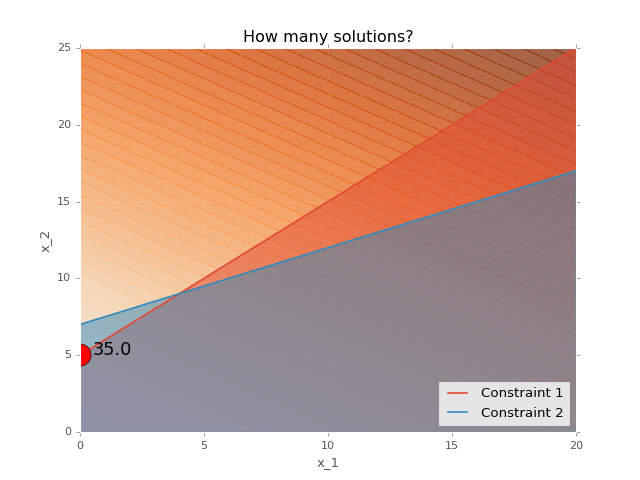

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,-1,1,1,0,5,x_2
c_2,0.5,0,-1,1,2,s_2
z,-12,0,7,0,35,


<function __main__.unbounded_optima>

In [30]:
interact(unbounded_optima, step=(0,2))

## Degeneracy and Cycling

<IPython.core.display.Javascript object>


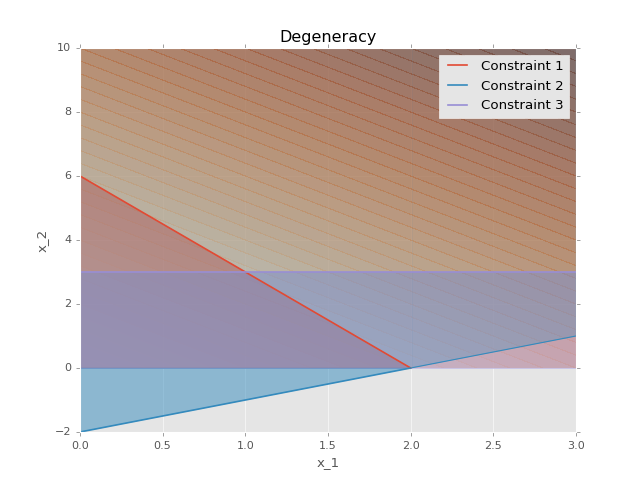

In [32]:
constraints_dnc = numpy.array([[ 3.0,  1.0,  6.0],
                           [ 1.0, -1.0,  2.0],
                           [ 0.0,  1.0,  3.0]])
axes = plot_it(x_1_bounds=[0.0,3.0], x_2_bounds=[0.0,10.0], constraints=constraints_dnc, objective=[2,1], 
               title='Degeneracy', legend_loc=1)
xs = numpy.linspace(2.01, 3.0, 2)
ys = (constraints_dnc[1,2] - constraints_dnc[1,0] * xs) / constraints_dnc[1,1]
axes.plot(xs, ys, color=plt.rcParams['axes.color_cycle'][1])
axes.fill_between(xs, ys, 10, alpha=0.3, color=plt.rcParams['axes.color_cycle'][1])
axes.fill_between(numpy.linspace(0.0, 2.0, 2), 0.0, 10.0, alpha=0.3, color=plt.rcParams['axes.color_cycle'][1])
plt.show()

\begin{align}
\text{maximise}   \quad &  2x_1 +   x_2         \\
\text{subject to} \quad &  3x_1 +   x_2 \leq 6  \\
                        &   x_1 -   x_2 \leq 2 \\
                        &           x_2 \leq 3  \\
\text{and}        \quad & x_1, x_2 \geq 0
\end{align}

In [36]:
tableau_degenerate = make_tableau(constraints=np.array([[   3.0,  1.0,  1.0, 0.0, 0.0,  6.0, 's_1'],
                                                        [   1.0, -1.0,  0.0, 1.0, 0.0,  2.0, 's_2'],
                                                        [   0.0,  1.0,  0.0, 0.0, 1.0,  3.0, 's_3']]),
                                 objective=np.array([[-2.0, -1.0, 0.0, 0.0, 0.0, 0.0, '']]),
                                 variables=['x_1','x_2','s_1','s_2', 's_3'])
tableaux_degenerate = dict()
run_simplex(tableaux_degenerate, tableau_degenerate)

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,3,1,1,0,0,6,s_1
c_2,1,-1,0,1,0,2,s_2
c_3,0,1,0,0,1,3,s_3
z,-2,-1,0,0,0,0,


Basic variables: 
['s_1' 's_2' 's_3']
Non-basic variables: 
['x_1' 'x_2']
Entering variable: 
x_1
Ratios: 
c_1    2
c_2    2
c_3   -1
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


Basic variables: 
['x_1' 's_2' 's_3']
Non-basic variables: 
['s_1' 'x_2']
Entering variable: 
x_2
Ratios: 
c_1    6
c_2   -1
c_3    3
Name: value, dtype: object
Departing variable: 
s_3


,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0.333333,0,-0.333333,1,x_1
c_2,0,0,-0.333333,1,1.33333,4,s_2
c_3,0,1,0,0,1,3,x_2
z,0,0,0.666667,0,0.333333,5,


In [37]:
step_coords, step_value = calculate_steps(tableaux_degenerate)

def degeneracy(step): 
    axes = plot_it(x_1_bounds=[0.0,3.0], x_2_bounds=[0.0,10.0], constraints=constraints_dnc, objective=[2,1], 
               title='Degeneracy', legend_loc=1)
    axes.plot(step_coords[step,0], step_coords[step,1], 'ro', markersize=20)
    xs = numpy.linspace(2.01, 3.0, 2)
    ys = (constraints_dnc[1,2] - constraints_dnc[1,0] * xs) / constraints_dnc[1,1]
    axes.plot(xs, ys, color=plt.rcParams['axes.color_cycle'][1])
    axes.fill_between(xs, ys, 10, alpha=0.3, color=plt.rcParams['axes.color_cycle'][1])
    axes.fill_between(numpy.linspace(0.0, 2.0, 2), 0.0, 10.0, alpha=0.3, color=plt.rcParams['axes.color_cycle'][1])
    axes.text(step_coords[step][0]+0.1, step_coords[step][1], step_value[step], fontsize=16)
    display(tableaux_degenerate[step])
    plt.show()
    return

<IPython.core.display.Javascript object>


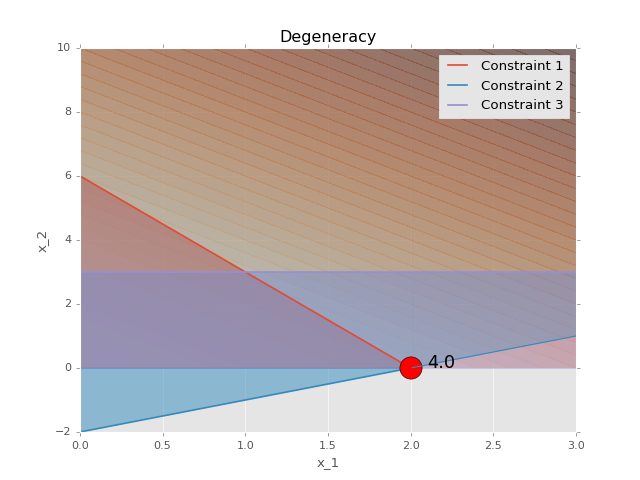

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


<function __main__.degeneracy>

In [38]:
interact(degeneracy, step=(0,2))

### Check your Bland's Rule privilege!

In [42]:
tableaux_degenerate[1]

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


Without Bland's Rule, one could potentially choose to pivot on $s_2$, which will give us

In [43]:
pivot('s_2', 'x_2', tableaux_degenerate[1])
tableaux_degenerate[1]

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0.25,0.25,0,2,x_1
c_2,-0,1,0.25,-0.75,-0,-0,x_2
c_3,0,0,-0.25,0.75,1,3,s_3
z,0,0,0.75,-0.25,0,4,


Choosing $x_2$ to pivot back to seems like a good idea, right? Nope.

In [44]:
pivot('x_2', 's_2', tableaux_degenerate[1])
tableaux_degenerate[1]

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


> #### You think you're moving, but you get nowhere. — Stop and Stare, OneRepublic

Using Bland's rule, the Simplex algorithm will halt in finite time on all inputs.

What really caused the trouble?

In [45]:
tableaux_degenerate[1]

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


Recall Bland's Rule:

> #### Choose the entering variable to be the non-basic variable with the most negative coefficient
>
> #### Choose the departing variable from the list of basic variables using the minimum ratio test

### $\epsilon$-perturbations

\begin{align}
\text{maximise}   \quad & c^T x \\
\text{subject to} \quad & Ax = b \\
\text{and}        \quad & x \geq 0
\end{align}

With $\epsilon$-perturbations, we will instead solve

\begin{align}
\text{maximise}   \quad & c^T x \\
\text{subject to} \quad & Ax = b + \epsilon \\
\text{and}        \quad & x \geq 0
\end{align}

# Time Complexity

Average-case: Polynomial time

Worst-case: ???

## The Klee-Minty Cube

A very slightly squished hypercube

\begin{align}
\text{maximise}   \quad & y_n \\
\text{subject to} \quad & 0 \leq y_1 \leq 1 \\
                        & \epsilon y_{j-1} \leq y_j \leq 1 - \epsilon y_{j-1}, ~ j = 2, 3, \ldots, n \\
\text{and}        \quad & y_j \geq 0, ~ j = 1, 2, \ldots n
\end{align}

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Unitcube.svg/440px-Unitcube.svg.png)

With change of variable

$$
x_1 = y_1 \qquad \text{and} \qquad  x_j = \frac{y_j - \epsilon y_{j-1}}{\epsilon^{j-1}}
$$

This becomes, in standard form,

\begin{align}
\text{maximise}   \quad & \sum_i^n x_i \\
\text{subject to} \quad & 2 \sum_{i=1}^{j-1} x_i + x_j \leq \left( \frac{1}{\epsilon} \right)^{j-1}, ~ j = 1, 2, \ldots n \\
\text{and}        \quad & x_j \geq 0, ~ j = 1, 2, \ldots n
\end{align}

For $n=3$, we have

\begin{align}
\text{maximise}   \quad &  100x_1 +  10x_2 + x_3          \\
\text{subject to} \quad &     x_1                \leq 1   \\
                        &   20x_1 +    x_2       \leq 100 \\
                        &  200x_1 +  20x_2 + x_3 \leq 10000\\
\text{and}        \quad & x_1, x_2, x_3 \geq 0
\end{align}

In [46]:
tableau_klee_minty = make_tableau(constraints=np.array([[   1.0,   0.0,  0.0, 1.0, 0.0, 0.0,     1.0, 's_1'],
                                                        [  20.0,   1.0,  0.0, 0.0, 1.0, 0.0,   100.0, 's_2'],
                                                        [ 200.0,  20.0,  1.0, 0.0, 0.0, 1.0, 10000.0, 's_3']]),
                                 objective=np.array([[-100.0, -10.0, -1.0, 0.0, 0.0, 0.0,     0.0,    '']]),
                                 variables=['x_1','x_2','x_3','s_1','s_2', 's_3'])
tableaux_klee_minty = dict()
run_simplex(tableaux_klee_minty, tableau_klee_minty)

,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,s_1
c_2,20,1,0,0,1,0,100,s_2
c_3,200,20,1,0,0,1,10000,s_3
z,-100,-10,-1,0,0,0,0,


Basic variables: 
['s_1' 's_2' 's_3']
Non-basic variables: 
['x_1' 'x_2' 'x_3']
Entering variable: 
x_1
Ratios: 
c_1     1
c_2     5
c_3    50
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,x_1
c_2,0,1,0,-20,1,0,80,s_2
c_3,0,20,1,-200,0,1,9800,s_3
z,0,-10,-1,100,0,0,100,


Basic variables: 
['x_1' 's_2' 's_3']
Non-basic variables: 
['s_1' 'x_2' 'x_3']
Entering variable: 
x_2
Ratios: 
c_1     -1
c_2     80
c_3    490
Name: value, dtype: object
Departing variable: 
s_2


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,x_1
c_2,0,1,0,-20,1,0,80,x_2
c_3,0,0,1,200,-20,1,8200,s_3
z,0,0,-1,-100,10,0,900,


Basic variables: 
['x_1' 'x_2' 's_3']
Non-basic variables: 
['s_1' 's_2' 'x_3']
Entering variable: 
s_1
Ratios: 
c_1     1
c_2    -1
c_3    41
Name: value, dtype: object
Departing variable: 
x_1


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,s_1
c_2,20,1,0,0,1,0,100,x_2
c_3,-200,0,1,0,-20,1,8000,s_3
z,100,0,-1,0,10,0,1000,


Basic variables: 
['s_1' 'x_2' 's_3']
Non-basic variables: 
['s_2' 'x_1' 'x_3']
Entering variable: 
x_3
Ratios: 
c_1      -1
c_2      -1
c_3    8000
Name: value, dtype: object
Departing variable: 
s_3


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,s_1
c_2,20,1,0,0,1,0,100,x_2
c_3,-200,0,1,0,-20,1,8000,x_3
z,-100,0,0,0,-10,1,9000,


Basic variables: 
['s_1' 'x_2' 'x_3']
Non-basic variables: 
['s_2' 's_3' 'x_1']
Entering variable: 
x_1
Ratios: 
c_1    1
c_2    5
c_3   -1
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,x_1
c_2,0,1,0,-20,1,0,80,x_2
c_3,0,0,1,200,-20,1,8200,x_3
z,0,0,0,100,-10,1,9100,


Basic variables: 
['x_1' 'x_2' 'x_3']
Non-basic variables: 
['s_1' 's_2' 's_3']
Entering variable: 
s_2
Ratios: 
c_1    -1
c_2    80
c_3    -1
Name: value, dtype: object
Departing variable: 
x_2


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,x_1
c_2,0,1,0,-20,1,0,80,s_2
c_3,0,20,1,-200,0,1,9800,x_3
z,0,10,0,-100,0,1,9900,


Basic variables: 
['x_1' 's_2' 'x_3']
Non-basic variables: 
['s_1' 's_3' 'x_2']
Entering variable: 
s_1
Ratios: 
c_1    1
c_2   -1
c_3   -1
Name: value, dtype: object
Departing variable: 
x_1


,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,s_1
c_2,20,1,0,0,1,0,100,s_2
c_3,200,20,1,0,0,1,10000,x_3
z,100,10,0,0,0,1,10000,


In [47]:
len(tableaux_klee_minty)

8

We actually visit all the sides of this cube, even though it should have been attainable in just one pivot.

http://wp.kntu.ac.ir/peyghami/images/KC1.gif

### What went wrong?

In [48]:
tableaux_klee_minty[0]

,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,s_1
c_2,20,1,0,0,1,0,100,s_2
c_3,200,20,1,0,0,1,10000,s_3
z,-100,-10,-1,0,0,0,0,


In [49]:
pivot('s_3', 'x_3', tableaux_klee_minty[0])
tableaux_klee_minty[0]

,x_1,x_2,x_3,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0,1,0,0,1,s_1
c_2,20,1,0,0,1,0,100,s_2
c_3,200,20,1,0,0,1,10000,x_3
z,100,10,0,0,0,1,10000,


The greedy algorithm for choosing objective maximising entering variables backfired on us!

## Defeating the Klee-Minty Cube

"Gold standard" for evaluating how well a linear programming algorithm performs

Randomly choose pivots: Polynomial $\mathcal{O}(n^3)$ worst case, but the average-case is worse off.

Interior point methods, e.g. Karmarkar's (1984) Algorithm

# Other Linear Programming Algorithms

Criss-cross Algorithm

Karmarkar's (1984) Algorithm (polynomial time worst case)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Karmarkar.svg/800px-Karmarkar.svg.png?1448439272979)

# Open Problems

Integer linear programming (NP-hard!)

"Strongly polynomial" time bounds

# Questions?

# References

George B. Dantzig, Mukund N. Thapa _Linear Programming 1- Introduction_ (Springer Series in Operations Research and Financial Engineering)

http://mat.gsia.cmu.edu/classes/QUANT/NOTES/chap7.pdf

http://college.cengage.com/mathematics/larson/elementary_linear/4e/shared/downloads/c09s3.pdf

http://college.cengage.com/mathematics/larson/elementary_linear/4e/shared/downloads/c09s4.pdf

http://www.iip.ist.i.kyoto-u.ac.jp/member/cuturi/Teaching/ORF522/lec8v2.pdf

http://math.stackexchange.com/questions/82006/in-simplex-method-if-the-leaving-variable-fails-for-all-candidates-of-mrt-what

https://www.math.unl.edu/~sdunbar1/ProbabilityTheory/Lessons/Applications/LinearOptimization/linearoptimization.pdf